<a href="https://colab.research.google.com/github/IzaLech/MyProjects/blob/main/Data_Analysis_Pandas%2BSeaborn_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DATA ANALYSIS: TITANIC PROJECT
---

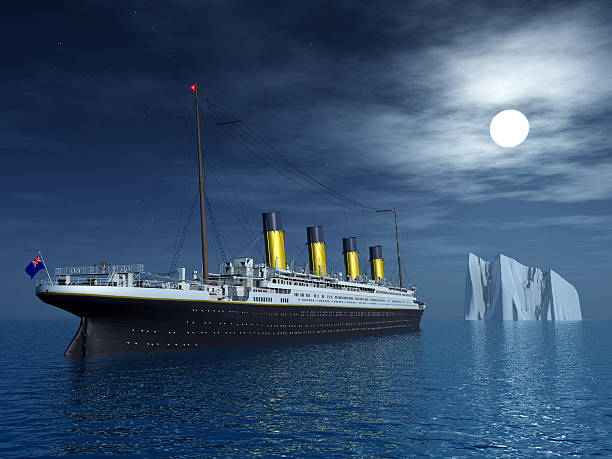

On the night of April 14/15, 1912, during voyage on the route Southampton - New York, the Titanic was collided with an iceberg and sank.

Of the 2,208–2,228 passengers and crew on the Titanic, over 1,505 died.
Only about 730 survived the disaster.




---




**Used libraries:**
*   Pandas
*   Numpy
*   Matplotlib
*   Seaborn





**Project questions:**

1.   What determined the higher probability of survival:
*   sex,
*   age,
*   social status,
*   location on board?




2.   What is the relationship between the above criteria?


3.   Which social group had the best chance of survival?











NOTE: I have data on only about 900 passengers, however, based on their analysis, I will try to answer the questions asked.







---

Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Loading dataset

In [2]:
tit = sns.load_dataset('titanic')
tit.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Basic information about the dataset

In [3]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
tit.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Preprocessing data

In [5]:
tit['Survived'] = tit.survived
tit.Survived = tit.Survived.astype(str)
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Survived
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [6]:
tit.Survived = tit.Survived.apply(lambda s: s.replace('0' , 'not survived'))
tit.Survived = tit.Survived.apply(lambda s: s.replace('1' , 'survived'))

In [7]:
total = len(tit)
print(total)

891


In [8]:
clean_tit = tit[['sex' , 'class' , 'survived']]

In [9]:
tit_survived = tit[tit['Survived']=='survived']
tit_survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     342 non-null    int64   
 1   pclass       342 non-null    int64   
 2   sex          342 non-null    object  
 3   age          290 non-null    float64 
 4   sibsp        342 non-null    int64   
 5   parch        342 non-null    int64   
 6   fare         342 non-null    float64 
 7   embarked     340 non-null    object  
 8   class        342 non-null    category
 9   who          342 non-null    object  
 10  adult_male   342 non-null    bool    
 11  deck         136 non-null    category
 12  embark_town  340 non-null    object  
 13  alive        342 non-null    object  
 14  alone        342 non-null    bool    
 15  Survived     342 non-null    object  
dtypes: bool(2), category(2), float64(2), int64(4), object(6)
memory usage: 36.5+ KB




---


PLOTS IN SEABORN AND PIVOT TABLES

**--- DECK ---**

Number of passengers depending on the deck



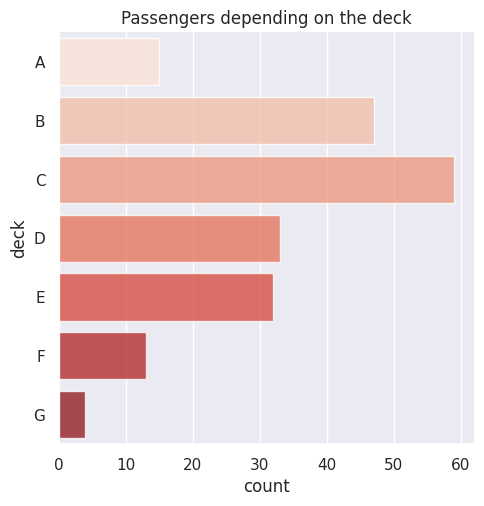

In [10]:
sns.catplot(data=tit, y='deck' , kind='count', palette='Reds', alpha=0.8)
plt.title('Passengers depending on the deck')
plt.show()

Number of survivors by deck

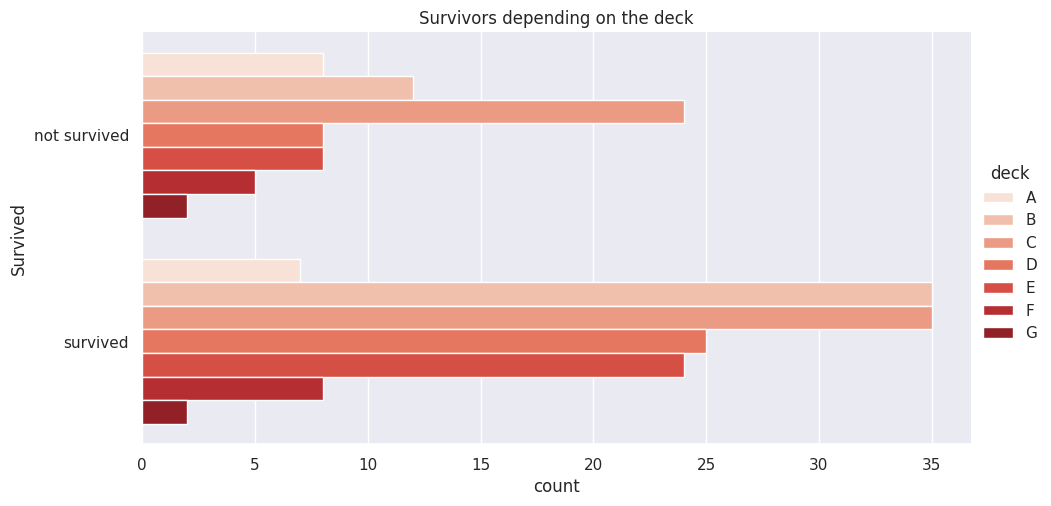

In [11]:
sns.catplot(data=tit, y='Survived', kind='count', hue='deck', palette='Reds', aspect=2)
plt.title('Survivors depending on the deck')
plt.show()

**Conclusion 1:**

NOTE: The following conclusions are based on a small dataset, only 200, so may differ from actual survival on particular decks.

1.   The most passengers were on board C.
2.   The largest number of survivors were on boards B and C,  afterwards on
 boards D and E.
3.   The fewest survivors was from C deck.







**--- SEX ---**

Number of passengers depending **on** sex




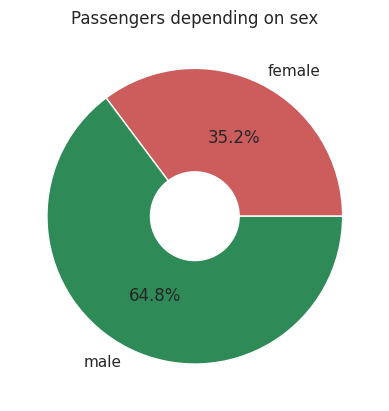

In [12]:
by_sex = tit.groupby('sex').size()
by_sex.plot(kind='pie', autopct='%1.1f%%', colors=['indianred', 'seagreen'], title='Passengers depending on sex')
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Number of survivors by sex

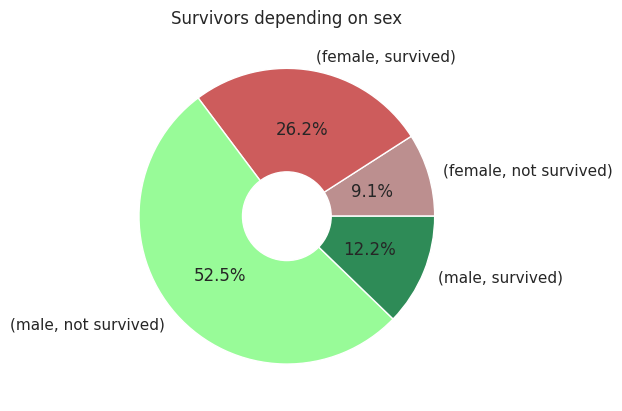

In [13]:
by_sex_2 = tit.groupby(['sex','Survived']).size()
by_sex_2.plot(kind='pie' , colors=['rosybrown','indianred' , 'palegreen', 'seagreen'], autopct='%1.1f%%', title='Survivors depending on sex')
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Pivot table: Survivors depending on sex

In [16]:
pd.pivot_table(data=tit, values='survived' , index='Survived' , columns='sex' , aggfunc='count')

sex,female,male
Survived,,
not survived,81,468
survived,233,109


**Conclusion 2:**

1.   There were more men than women.
2.   The vast majority of men did not survive.
3.   Most of the women survived.


**--- CLASS ---**

Number of passengers depending on class

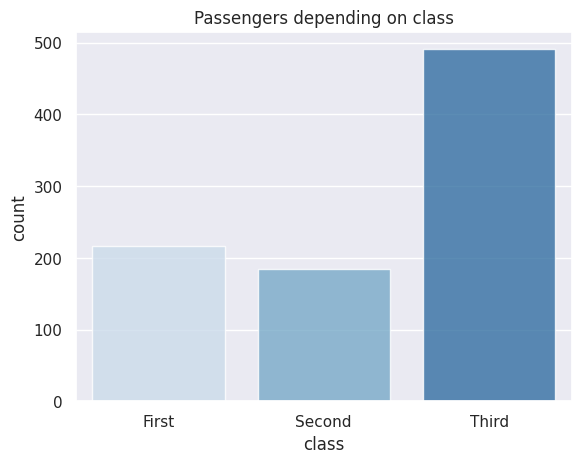

In [17]:
sns.countplot(tit, x='class', palette='Blues', alpha=0.8)
plt.title('Passengers depending on class')
plt.show()

Number of survivors by class







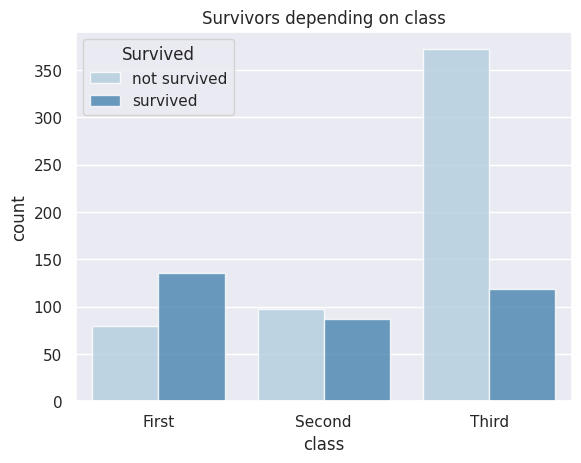

In [18]:
sns.countplot(tit, x='class', hue='Survived', palette='Blues', alpha=0.8)
plt.title('Survivors depending on class')
plt.show()

Pivot table: Survivors depending on class

In [19]:
pd.pivot_table(data=tit, values='survived' , index='Survived' , columns='class' , aggfunc='count').pipe(lambda d: d.div(total, axis='index')).applymap('{:.0%}'.format)


class,First,Second,Third
Survived,,,
not survived,9%,11%,42%
survived,15%,10%,13%


**Conclusion 3:**

1.  The largest number of passengers are third class passengers.
2.  Most of third class passengers did not survive.
3.  The number of survivors in each class was comparable.

**Number of survivors by sex and class**



*   Pivot table: Number of surviving passengers by class and sex



In [20]:
tit_survived.pivot_table(values='survived' , index='sex' , columns='class' , aggfunc='count')

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47




*   Pivot table: Number of surviving passengers by class and sex as a percentage



In [21]:
tit_survived.pivot_table(values='survived' , index='sex' , columns='class' , aggfunc='count').pipe(lambda d: d.div(total, axis='index')).applymap('{:.0%}'.format)


class,First,Second,Third
sex,,,
female,10%,8%,8%
male,5%,2%,5%




*   Plot: Number of surviving passengers by class and sex





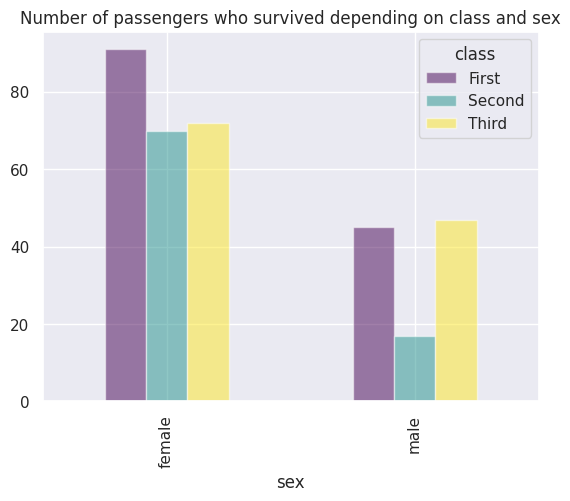

In [22]:
tit_survived.pivot_table(values='survived' , index='sex' , columns='class' , aggfunc='count').plot(kind='bar' , cmap='viridis' , alpha=0.5)
plt.title('Number of passengers who survived depending on class and sex')
plt.show()

**Conclusion 4:**

1. The survival of women in each class is similar, with slightly more survivors of women in the first class.
2. Most men survived from first and third class.



**--- AGE ---**

Histogram of passenger age ranges







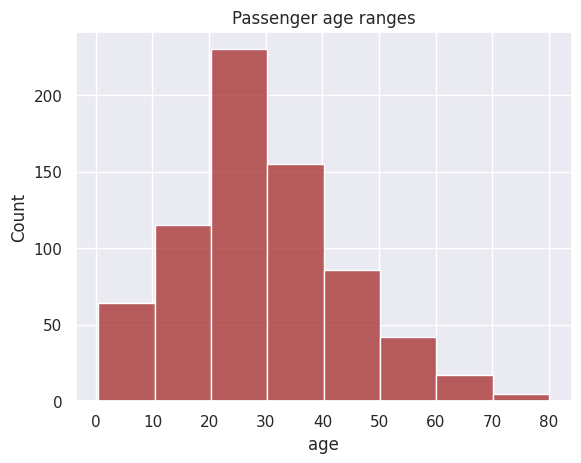

In [23]:
sns.histplot(tit['age'] , bins=8, color='Brown')
plt.title('Passenger age ranges')
plt.show()

Histogram of survivors age ranges

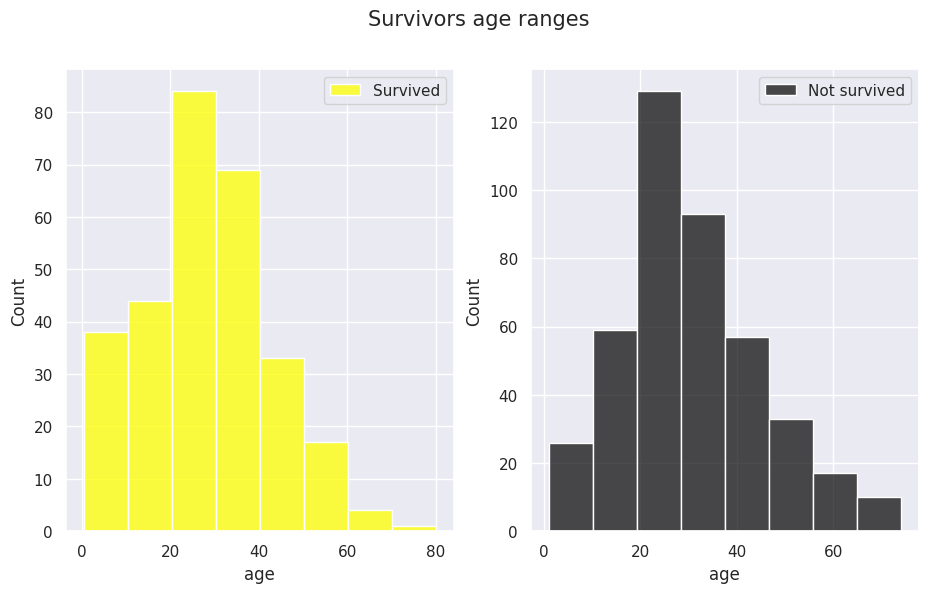

In [24]:
sns.set(rc={'figure.figsize':(11,6)})
fig, axes = plt.subplots(1, 2)

sns.histplot(tit[tit['Survived']=='survived']['age'] , bins=8, label='Survived', color='Yellow', ax=axes[0])
axes[0].legend()
sns.histplot(tit[tit['Survived']=='not survived']['age'] , bins=8, alpha=0.7, color='Black', label='Not survived', ax=axes[1])
axes[1].legend()

plt.suptitle('Survivors age ranges', fontsize=15)
plt.show()

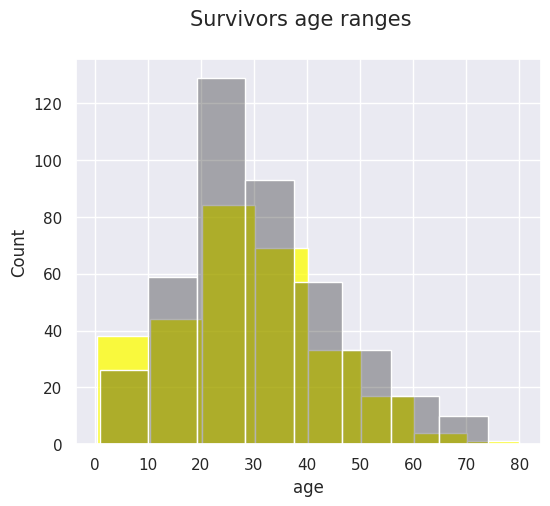

In [39]:
sns.set(rc={'figure.figsize':(6,5)})
sns.histplot(tit[tit['Survived']=='survived']['age'] , bins=8, label='Survived', color='Yellow')
sns.histplot(tit[tit['Survived']=='not survived']['age'] , bins=8, alpha=0.3, color='Black', label='Not survived')
plt.suptitle('Survivors age ranges', fontsize=15)
plt.show()

**Conclusion 5:**

1.   Most passengers were between the ages of 20 and 30.
2.   The age group from 20 to 40 years old has the highest number of survivors and also passengers who did not survive.
3.   In the above age range, most of the passengers did not survive.
3.   Most passengers between the ages of 0 and 10 were survived.



Pivot table: Making variable age categorical and grouping by age



In [31]:
tit['age_bin'] = pd.cut(x=tit['age'], bins=[0,18,80])
pd.pivot_table(data=tit, values='survived' , index='age_bin' , columns='class' , aggfunc='count')

class,First,Second,Third
age_bin,,,
"(0, 18]",16,29,94
"(18, 80]",170,144,261


Making subplots: Passengers in particular age categories




In [32]:
r_age = pd.pivot_table(data=tit, values='age' , index='age_bin' , columns='sex' , aggfunc='count')
r_age

sex,female,male
age_bin,,
"(0, 18]",68,71
"(18, 80]",193,382


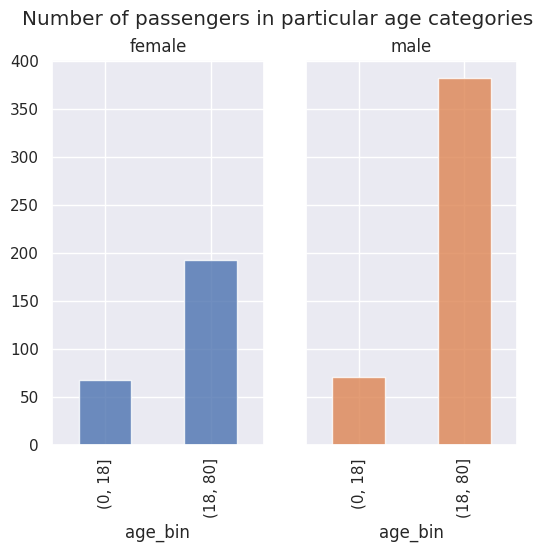

In [29]:
r_age.plot(subplots=True, kind='bar' , sharey=True , layout=(1,2) , title='Number of passengers in particular age categories', alpha=0.8 , legend=False)
plt.show()

**Conclusion 6**


1.   The same number of girls and boys were present on the ship(i.e. people up to 18 years of age).
2.   There were definitely more adult men than adult women.





tu będzie jeszcze analiza przeżycia wględem tych przedziałów wiekowych 0-18 i 18-80

In [42]:
r_age_2 = pd.pivot_table(data=tit[tit['Survived']=='survived'], values='age' , index='age_bin' , columns='sex' , aggfunc='count')
r_age_2

sex,female,male
age_bin,,
"(0, 18]",46,24
"(18, 80]",151,69


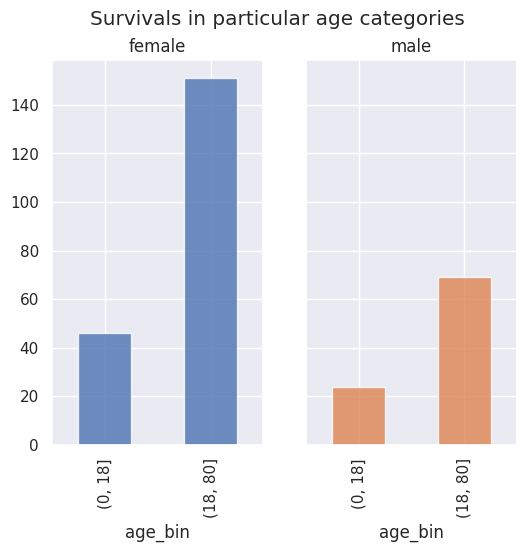

In [40]:
r_age_2.plot(subplots=True, kind='bar' , sharey=True , layout=(1,2) , title='Survivals in particular age categories', alpha=0.8 , legend=False)
plt.show()

**Conclusion 7**


1.   In both age groups, more women than men were survived.
2. The vast majority of survivors were adult women

EXTRA: Pivot table:


*   average age in each class,
*   average ticket price in each class,
*   number of survivors in each class.





In [ ]:
pd.pivot_table(data=tit, index='sex' , columns='class' , aggfunc={'survived':sum, 'fare':'mean', 'age':'mean'})

age                              fare                        \
class       First     Second      Third       First     Second      Third   
sex                                                                         
female  34.611765  28.722973  21.750000  106.125798  21.970121  16.118810   
male    41.281386  30.740707  26.507589   67.226127  19.741782  12.661633   

       survived               
class     First Second Third  
sex                           
female       91     70    72  
male         45     17    47

tu będzie ostateczne podsumowanie